# 1. Import Libraries

In [1]:
# Math
import numpy as np 
from numpy import random, sqrt, log, sin, cos, pi
import math

# Running time
import timeit

# Statistics
from scipy.stats import norm
from scipy import stats
import scipy.stats


#Statistical tests
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
import statsmodels.api as sm
import scipy.stats as ss

from scipy.stats import expon

# Plotting
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
from pylab import show,hist,subplot,figure
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)

# 2. Define functions

In [2]:
# Generating standard uniform random numbers
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a*rng.current + c) % m
    return rng.current/m

# Inverse Transformation Sampling
def sample_normal_inverse_transform(mu, sigma):
    """Sample from a normal distribution using Inverse Sampling Transformation."""
    # Generate a uniform random variable
    u = np.random.uniform(0, 1)
    # Calculating the inverse cdf at u for the given normal distribution
    # with mean mu and standard deviation sigma   
    x = norm.ppf(u, loc=mu, scale=sigma)
    return x

# Box-Muller Transformation (standard normal distribution)
def sample_normal_boxmuller(u1,u2):
  z1 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
  z2 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)
  return z1,z2

# Box-Muller Transformation (normal distribution with any mean and standard deviation)
def sample_normal_boxmuller_adj(mu, sigma):
    """Sample from a normal distribution using Box-Muller method."""
    # Two uniform random variables
    u = np.random.uniform(0, 1, 2)
    # Box-Muller formula returns sample from STANDARD normal distribution
    x = math.cos(2*np.pi*u[0]) * math.sqrt(-2*math.log(u[1])) 
    return mu + sigma * x

# Rejection Sampling
def sample_normal_rejection(mu, sigma):
    """Sample from a normal distribution using rejection sampling."""
    # Length of interval from wich samples are drawn
    interval = 5*sigma
    # Maximum value of the pdf of the desired normal distribution
    max_density = scipy.stats.norm(mu,sigma).pdf(mu)
    # Rejection loop
    while True:
        x = np.random.uniform(mu - interval, mu + interval, 1)[0] 
        y = np.random.uniform(0, max_density, 1)
        if y <= scipy.stats.norm(mu, sigma).pdf(x):
            break 
    return x

# Rejection Sampling
def sample_normal_rejection2(mu, sigma):

    
    
    while True:
        y = expon.rvs(scale = 1)
        if np.random.uniform(0, 1) <= stats.halfnorm.pdf(y)/(c*stats.expon.pdf(y)):
                
            if np.random.uniform(0, 1) <= 0.5:
                z = y       
        
            else:
                z = y*-1
            break
            
    return mu + sigma*z

# Plot normal distribution
def plot_normal(x_range, mu=0, sigma=1, cdf=False, **kwargs):
    '''
    Plots the normal distribution function for a given x range
    If mu and sigma are not provided, standard normal is plotted
    If cdf=True cumulative distribution is plotted
    Passes any keyword arguments to matplotlib plot function
    '''
    x = x_range
    if cdf:
        y = ss.norm.cdf(x, mu, sigma)
    else:
        y = ss.norm.pdf(x, mu, sigma)
    plt.plot(x, y, **kwargs)

# 3.1 Pseudorandom number generators

While pseudorandom numbers are generated by a deterministic algorithm, we can usually treat them as if they were real random numbers and thus we can drop the prefix "pseudo".

Basically, the algorithm generates random integers, which are then normalized to obtain a floating point number from the standard uniform distribution.


Random numbers from other distributions are in turn generated with these uniform random deviates, either using general (inverse transformation, accept/reject) or special ad hoc methods (e.g. Box-Muller).

# 3.2 Generating standard uniform random numbers

Linear congruential generators (LCG)

$ z_{i+1} = (az_{i}+c) \ mod \ m  $

Hull-Dobell Theorem: The LCG will have a full period for all seeds if and only if

c and m are relatively prime, <br>
a−1 is divisible by all prime factors of m <br>
a−1 is a multiple of 4 if m is a multiple of 4. <br>

The number $ z_{0}$ is called the seed, and setting it allows us to obtain a reproducible sequence of “random” numbers.

The LCG is typically coded to return z/m, a floating point number in (0, 1). This can be scaled to any other range (a,b). 

Most pseudorandom number generators today use the Mersenne Twister, but the LCG is presented because the LCG code is much easier to understand and sufficient for our purposes. 

### Generate Samples

In [3]:
# Set seed 
rng.current = 1

tic = timeit.default_timer()

n_samples = 5000

# Generate n_samples samples 
samples_uniform = []
for i in range(n_samples):
    samples_uniform.append(rng())  

toc = timeit.default_timer()

###  Histogram Plot

running time = 0.004, mean = 0.504, std_dev = 0.288


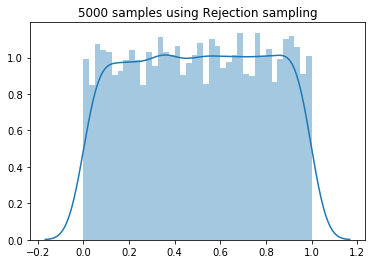

In [4]:
# Plot n_samples samples 

sns.distplot(samples_uniform, bins=40).set_title(str(n_samples)+ " samples using Rejection sampling");

print("running time = %.3f, mean = %.3f, std_dev = %.3f" % (toc-tic, np.mean(samples_uniform), np.std(samples_uniform)));

# 4. Generate normally distributed numbers (with any mu and sigma)

### Parameter

In [5]:
mu = 0
sigma = 1
n_samples = 5000

## 4.1 Inverse Sampling Transformation

Once we have standard uniform numbers, we can generate random numbers from other distribution using the inverse transform method. 

If X is a continuous random variable with CDF $F_{x}$, then Y=$F_{x}$(X) has the standard uniform distribution. 

Inverting this suggests that if Y comes from a standard uniform distribution, then $F_{x}^{-1}(Y)$ has the same distribution as X. 

### Generate samples

In [6]:
# Generate n_samples samples 

tic = timeit.default_timer()

samples_i_t = []
for i in range(n_samples):
    samples_i_t.append(sample_normal_inverse_transform(mu, sigma)) 
    
toc = timeit.default_timer()

###  Histogram Plot
One simple and frequently used graphical representation to check whether our data sample is normally distributed is the histogram. A Gaussian distribution is indicated when the histogram shows the well-known bell shape.

running time = 0.928, mean = 0.011, std_dev = 1.009


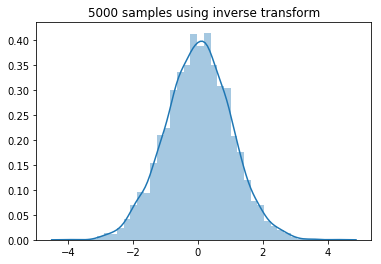

In [7]:
# Plot histogram

sns.distplot(samples_i_t, bins=40).set_title(str(n_samples)+ ' samples using inverse transform')

print("running time = %.3f, mean = %.3f, std_dev = %.3f" % (toc-tic, np.mean(samples_i_t), np.std(samples_i_t)));

### Q-Q Plot and P-P Plot
The quantile-quantile plot, or **Q-Q plot** for short, is another graphical method we use to determine whether our data sample cames from the normal distribution. A Q-Q plot is a scatterplot created by plotting the quantiles of the sample distribution and the quantiles of the theoretical distribution against each other. The resulting points are displayed with the theoretical value on the x-axis and the data sample on the y-axis. If both sets of quantiles came from the same distribution, we should observe a line of points at an angle of 45 degrees from the bottom left to the top right.

The probability-probability plot, or **P-P plot** for short, is a probability plot that can be used to assess how closely our data sample agrees with the normal distribution. It plots the empirical cumulative distribution function and the theoretical cumulative distribution function against each other. If we can observe a straight line, then our data sample contains no outliers and the assumption that it comes from a normal distribution is considered fulfilled.

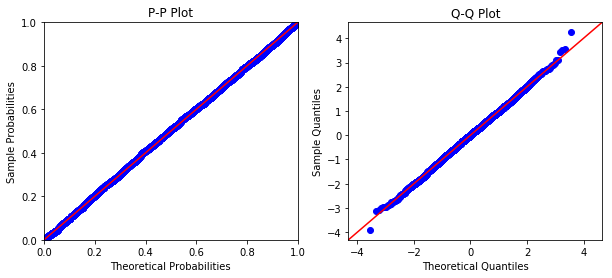

In [8]:
# Plot q-q and p-p plot
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
probplot = sm.ProbPlot(np.array(samples_i_t), dist=norm, fit=True)
probplot.ppplot(line='45', ax=ax[0])
probplot.qqplot(line='45', ax=ax[1])
ax[0].set_title('P-P Plot')
ax[1].set_title('Q-Q Plot');

### Boxplot
If our data sample is drawn from a Gaussian distribution, the box will be symmetrical with the mean and median in the center. Moreover, if the data sample corresponds to the assumption of normality, we should observe only a few outliers.

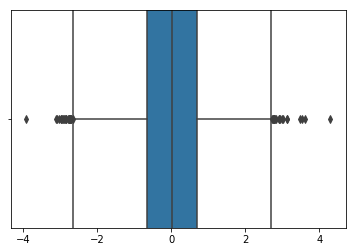

In [9]:
# Plot boxplot plot
sns.boxplot(samples_i_t, width=4);

### Empirical Cumulative Distribution Function Plot
An empirical CDF plot has a similar function to a P-P plot. However, unlike a probability plot, the empirical CDF plot has scales that are not transformed, and the fitted distribution does not form a straight line, but an S-shaped curve under normality. The empirical cumulative probabilities close to this S-shaped curve fulfill the normality assumption.

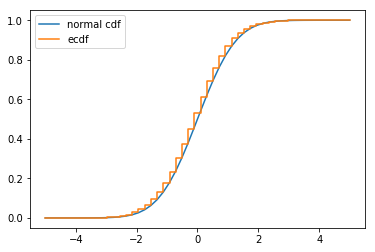

In [10]:
# Plot Empirical Cumulative Distribution vs Normal Cumulative Distribution
x=np.linspace(-5, 5)

# Plot normal cdf
plot_normal(x, mu=mu, sigma=sigma, cdf=True, label="normal cdf")

# Plor ecdf
ecdf = sm.distributions.ECDF(samples_i_t)
ecdf = ecdf(x)
plt.step(x, ecdf, label="ecdf")

plt.legend();

### Shapiro-Wilk Test
The Shapiro-Wilk test was developed by Samuel Shapiro and Martin Wilk and first presented in 1965. The test verifies the hypothesis that the underlying population of a data sample is normally distributed. More precisely, for the nominator the test statistic calculates what the variance of a data sample would look like if it came from a normal distribution (first estimator) and compares this "expected" variance with the actual variance of the data sample for the denominator (second estimator). If the population of the data sample is normally distributed, then both estimators for the variance should be approximately the same.

In [11]:
# Normality test
test = "Shapiro-Wilk Test"
stat, p = shapiro(samples_i_t)

# Round results
stat = round(stat, 3)
p = round(p, 3)

# Interpre results
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = "Sample does not look Gaussian (reject H0)"

# Create table
result_mat = [len(samples_i_t), stat, p, msg]

trace = go.Table(
    header=dict(values=['<b>Sample Size</b>', '<b>Statistic</b>', '<b>p-Value</b>', '<b>Comment</b>'],
                line = dict(width=0),
                fill = dict(color='rgba(42,63,95,0.8)'),
                align = 'center',
                font = dict(
                    color = '#ffffff',
                    size = 12
                )),
    cells=dict(values=np.array(result_mat).T,
               line = dict(width=0),
               fill = dict(color=[['#EBF0F8', '#ffffff', '#EBF0F8', '#ffffff']]),
               align = 'center',
               height = 40),
    columnwidth=[0.3, 0.25, 0.3, 0.45])
       
data = [trace]

layout = dict(title=test, height=260, width=1000)

sw_table = dict(data=data, layout=layout)

# Plot table
py.offline.iplot(sw_table,  filename='jupyter-parametric_plot')

### D’Agostino’s K^2 Test
The D’Agostino-Pearson Omnibus Test (1973) computes summary statistics from the sample data to determine whether the data distribution deviates from the Gaussian distribution. Specifically, it first calculates the skewness and kurtosis to quantify how far the sample distribution deviates from the normal distribution in terms of asymmetry and shape. It then calculates to what extent each of these values differs from the value expected for a Gaussian distribution and calculates a single P value from the sum of these deviations.

In [12]:
# Normality test
test = "D’Agostino’s K^2 Test"
stat, p = normaltest(samples_i_t)

# Round results
stat = round(stat, 3)
p = round(p, 3)

# Interpre results
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = "Sample does not look Gaussian (reject H0)"

# Create table
result_mat = [len(samples_i_t), stat, p, msg]

trace = go.Table(
    header=dict(values=['<b>Sample Size</b>', '<b>Statistic</b>', '<b>p-Value</b>', '<b>Comment</b>'],
                line = dict(width=0),
                fill = dict(color='rgba(42,63,95,0.8)'),
                align = 'center',
                font = dict(
                    color = '#ffffff',
                    size = 12
                )),
    cells=dict(values=np.array(result_mat).T,
               line = dict(width=0),
               fill = dict(color=[['#EBF0F8', '#ffffff', '#EBF0F8', '#ffffff']]),
               align = 'center',
               height = 40),
    columnwidth=[0.3, 0.25, 0.3, 0.45])
       
data = [trace]

layout = dict(title=test, height=260, width=1000)

norm_table = dict(data=data, layout=layout)

# Plot table
py.offline.iplot(norm_table)

### Jarque-Beta Test
The Jarque-Bera test was proposed by Carlos M. Jarque and Anil K. Bera (1982) and also calculates summary statistics from the sample data to verify whether the data sample differs from the normal distribution. Concretely, the test determines whether the skewness and kurtosis of the data sample are unusual compared to their expected values, as measured by a chi-square statistic. 

In [13]:
# Normality test
test = "Jarque-Beta Test"
stat, p = stats.jarque_bera(samples_i_t)

# Round results
stat = round(stat, 3)
p = round(p, 3)

# Interpre results
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = "Sample does not look Gaussian (reject H0)"

# Create table
result_mat = [len(samples_i_t), stat, p, msg]

trace = go.Table(
    header=dict(values=['<b>Sample Size</b>', '<b>Statistic</b>', '<b>p-Value</b>', '<b>Comment</b>'],
                line = dict(width=0),
                fill = dict(color='rgba(42,63,95,0.8)'),
                align = 'center',
                font = dict(
                    color = '#ffffff',
                    size = 12
                )),
    cells=dict(values=np.array(result_mat).T,
               line = dict(width=0),
               fill = dict(color=[['#EBF0F8', '#ffffff', '#EBF0F8', '#ffffff']]),
               align = 'center',
               height = 40),
    columnwidth=[0.3, 0.25, 0.3, 0.45])
       
data = [trace]

layout = dict(title=test, height=260, width=1000)

jb_table = dict(data=data, layout=layout)

# Plot table
py.offline.iplot(jb_table)

### Kolmogorov Smirnov Test
The Kolmogorov-Smirnov test (KS test) was first derived by Kolmogorov (1933) and later modified by Smirnov (1948). It is a statistical test for the agreement of two probability distributions. More Specifically, it compares the cumulative distribution of the sample data with the expected cumulative normal distribution and bases its P value on the largest discrepancy. The KS test can be modified to serve as a normality test; in this case the samples are standardized and compared to a standard normal distribution. 

In [14]:
# Normality test
test = "Kolmogorov Smirnov Test"
stat, p = stats.kstest(np.array(samples_i_t),'norm', alternative = 'greater')

# Round results
stat = round(stat, 3)
p = round(p, 3)

# Interpre results
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = "Sample does not look Gaussian (reject H0)"

# Create table
result_mat = [len(samples_i_t), stat, p, msg]

trace = go.Table(
    header=dict(values=['<b>Sample Size</b>', '<b>Statistic</b>', '<b>p-Value</b>', '<b>Comment</b>'],
                line = dict(width=0),
                fill = dict(color='rgba(42,63,95,0.8)'),
                align = 'center',
                font = dict(
                    color = '#ffffff',
                    size = 12
                )),
    cells=dict(values=np.array(result_mat).T,
               line = dict(width=0),
               fill = dict(color=[['#EBF0F8', '#ffffff', '#EBF0F8', '#ffffff']]),
               align = 'center',
               height = 40),
    columnwidth=[0.3, 0.25, 0.3, 0.45])
       
data = [trace]

layout = dict(title=test, height=260, width=1000)

ks_table = dict(data=data, layout=layout)

# Plot table
py.offline.iplot(ks_table)

### Anderson-Darling
The Anderson-Darling test is another statistical test that can be used to determine whether the distribution of the data sample deviates from the Gaussian distribution. The test is named after Theodore Wilbur Anderson and Donald Allan Darling, who first described it in 1952. A feature of this test is that it provides a list of critical values, not just a single p-value, which allows a more thorough interpretation of the result.

In [15]:
# Normality test
test = "Anderson-Darling Test"
result = anderson(samples_i_t)

# Round results
stat = round(result.statistic, 3)

# Create table
result_mat = []
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        msg = 'Sample looks Gaussian (fail to reject H0)'
    else:
        msg = 'Sample does not look Gaussian (reject H0)'
    result_mat.append([len(samples_i_t), stat, sl, cv, msg])

trace = go.Table(
    header=dict(values=['<b>Sample Size</b>', '<b>Statistic</b>', '<b>Significance Level</b>', '<b>Critical Value</b>', '<b>Comment</b>'],
                line = dict(width=0),
                fill = dict(color='rgba(42,63,95,0.8)'),
                align = 'center',
                font = dict(
                    color = '#ffffff',
                    size = 12
                )),
    cells=dict(values=np.array(result_mat).T,
               line = dict(width=0),
               fill = dict(color=[['#EBF0F8', '#ffffff', '#EBF0F8', '#ffffff', '#EBF0F8']]),
               align = 'center',
               height = 40),
    columnwidth=[0.3, 0.25, 0.3, 0.25, 0.5])
       
data = [trace]

layout = dict(title=test, height=415, width=1000)

andar_table = dict(data=data, layout=layout)

# Plot table
py.offline.iplot(andar_table)

## 4.2 Rejection sampling

### Plot Target f(x) and  proposal g(x)

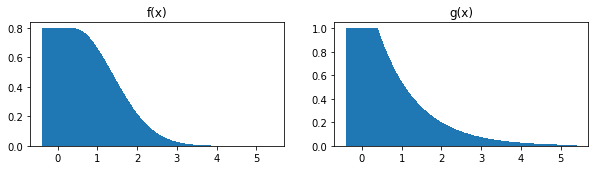

In [65]:
# Absolute Normal Distribution
y = np.linspace(0, 5, num=1000)

figure(figsize=(10,5))

subplot(221, title="f(x)")
plt.bar(y,stats.halfnorm.pdf(y, loc=0,scale=1))

subplot(222, title="g(x)") 
plt.bar(y,stats.expon.pdf(y, scale=1));

### Plot f(x) and shifted proposal c*g(x) 

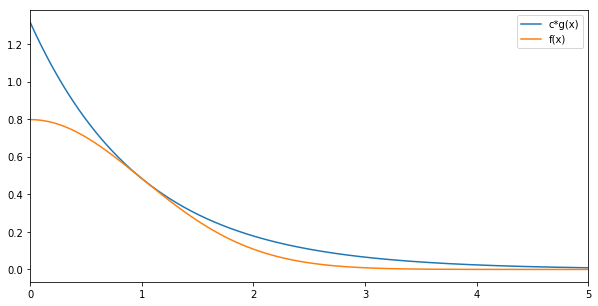

In [66]:
# Calculate Scale factor c --> f(y)/f(g)
c = 1*np.max(stats.halfnorm.pdf(y)/stats.expon.pdf(y))

# Plot it
plt.figure(figsize=(10,5))
plt.plot(y, c*stats.expon.pdf(y), label="c*g(x)")
plt.plot(y, stats.halfnorm.pdf(y), label="f(x)")
plt.xlim(0,5)
plt.legend();

### Generate Samples

In [67]:
tic = timeit.default_timer()

# Generate n_samples samples 
samples_r_s = []
for i in range(n_samples):
    samples_r_s.append(sample_normal_rejection2(mu, sigma))  

toc = timeit.default_timer()

###  Histogram Plot

running time = 2.037, mean = -0.016, std_dev = 1.007


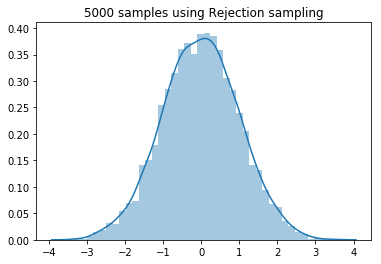

In [68]:
# Plot n_samples samples 

sns.distplot(samples_r_s, bins=40).set_title(str(n_samples)+ " samples using Rejection sampling");

print("running time = %.3f, mean = %.3f, std_dev = %.3f" % (toc-tic, np.mean(samples_r_s), np.std(samples_r_s)));

### Q-Q Plot and P-P Plot

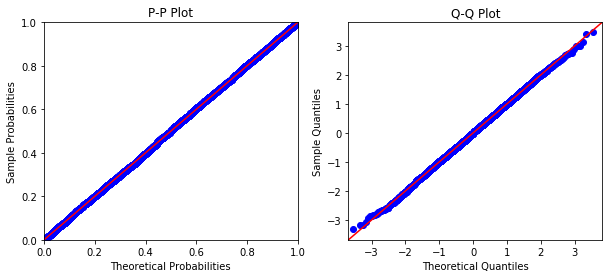

In [69]:
# Plot q-q and p-p plot
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
probplot = sm.ProbPlot(np.array(samples_r_s), dist=norm, fit=True)
probplot.ppplot(line='45', ax=ax[0])
probplot.qqplot(line='45', ax=ax[1])
ax[0].set_title('P-P Plot')
ax[1].set_title('Q-Q Plot');

### Boxplot

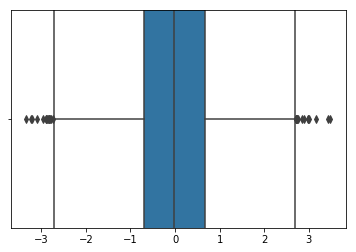

In [70]:
# Plot boxplot plot
sns.boxplot(samples_r_s, width=4);

### Empirical Cumulative Distribution Function Plot

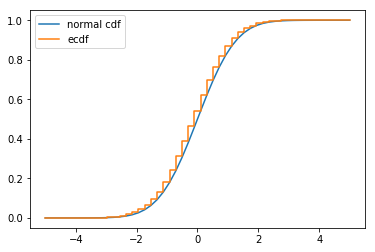

In [71]:
# Plot Empirical Cumulative Distribution vs Normal Cumulative Distribution
x=np.linspace(-5, 5)

# Plot normal cdf
plot_normal(x, mu=mu, sigma=sigma, cdf=True, label="normal cdf")

# Plor ecdf
ecdf = sm.distributions.ECDF(samples_r_s)
ecdf = ecdf(x)
plt.step(x, ecdf, label="ecdf")

plt.legend();

### Shapiro-Wilk Test

In [72]:
# Normality test
test = "Shapiro-Wilk Test"
stat, p = shapiro(samples_r_s)

# Round results
stat = round(stat, 3)
p = round(p, 3)

# Interpre results
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = "Sample does not look Gaussian (reject H0)"

# Create table
result_mat = [len(samples_r_s), stat, p, msg]

trace = go.Table(
    header=dict(values=['<b>Sample Size</b>', '<b>Statistic</b>', '<b>p-Value</b>', '<b>Comment</b>'],
                line = dict(width=0),
                fill = dict(color='rgba(42,63,95,0.8)'),
                align = 'center',
                font = dict(
                    color = '#ffffff',
                    size = 12
                )),
    cells=dict(values=np.array(result_mat).T,
               line = dict(width=0),
               fill = dict(color=[['#EBF0F8', '#ffffff', '#EBF0F8', '#ffffff']]),
               align = 'center',
               height = 40),
    columnwidth=[0.3, 0.25, 0.3, 0.45])
       
data = [trace]

layout = dict(title=test, height=260, width=1000)

sw_table = dict(data=data, layout=layout)

# Plot table
py.offline.iplot(sw_table)

### D’Agostino’s K^2 Test

In [73]:
# Normality test
test = "D’Agostino’s K^2 Test"
stat, p = normaltest(samples_r_s)

# Round results
stat = round(stat, 3)
p = round(p, 3)

# Interpre results
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = "Sample does not look Gaussian (reject H0)"

# Create table
result_mat = [len(samples_r_s), stat, p, msg]

trace = go.Table(
    header=dict(values=['<b>Sample Size</b>', '<b>Statistic</b>', '<b>p-Value</b>', '<b>Comment</b>'],
                line = dict(width=0),
                fill = dict(color='rgba(42,63,95,0.8)'),
                align = 'center',
                font = dict(
                    color = '#ffffff',
                    size = 12
                )),
    cells=dict(values=np.array(result_mat).T,
               line = dict(width=0),
               fill = dict(color=[['#EBF0F8', '#ffffff', '#EBF0F8', '#ffffff']]),
               align = 'center',
               height = 40),
    columnwidth=[0.3, 0.25, 0.3, 0.45])
       
data = [trace]

layout = dict(title=test, height=260, width=1000)

norm_table = dict(data=data, layout=layout)

# Plot table
py.offline.iplot(norm_table)

### Jarque-Beta Test

In [74]:
# Normality test
test = "Jarque-Beta Test"
stat, p = stats.jarque_bera(samples_r_s)

# Round results
stat = round(stat, 3)
p = round(p, 3)

# Interpre results
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = "Sample does not look Gaussian (reject H0)"

# Create table
result_mat = [len(samples_r_s), stat, p, msg]

trace = go.Table(
    header=dict(values=['<b>Sample Size</b>', '<b>Statistic</b>', '<b>p-Value</b>', '<b>Comment</b>'],
                line = dict(width=0),
                fill = dict(color='rgba(42,63,95,0.8)'),
                align = 'center',
                font = dict(
                    color = '#ffffff',
                    size = 12
                )),
    cells=dict(values=np.array(result_mat).T,
               line = dict(width=0),
               fill = dict(color=[['#EBF0F8', '#ffffff', '#EBF0F8', '#ffffff']]),
               align = 'center',
               height = 40),
    columnwidth=[0.3, 0.25, 0.3, 0.45])
       
data = [trace]

layout = dict(title=test, height=260, width=1000)

jb_table = dict(data=data, layout=layout)

# Plot table
py.offline.iplot(jb_table)

### Kolmogorov Smirnov Test

In [75]:
# Normality test
test = "Kolmogorov Smirnov Test"
stat, p = stats.kstest(np.array(samples_r_s),'norm', alternative = 'greater')

# Round results
stat = round(stat, 3)
p = round(p, 3)

# Interpre results
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = "Sample does not look Gaussian (reject H0)"

# Create table
result_mat = [len(samples_r_s), stat, p, msg]

trace = go.Table(
    header=dict(values=['<b>Sample Size</b>', '<b>Statistic</b>', '<b>p-Value</b>', '<b>Comment</b>'],
                line = dict(width=0),
                fill = dict(color='rgba(42,63,95,0.8)'),
                align = 'center',
                font = dict(
                    color = '#ffffff',
                    size = 12
                )),
    cells=dict(values=np.array(result_mat).T,
               line = dict(width=0),
               fill = dict(color=[['#EBF0F8', '#ffffff', '#EBF0F8', '#ffffff']]),
               align = 'center',
               height = 40),
    columnwidth=[0.3, 0.25, 0.3, 0.45])
       
data = [trace]

layout = dict(title=test, height=260, width=1000)

ks_table = dict(data=data, layout=layout)

# Plot table
py.offline.iplot(ks_table)

### Anderson-Darling

In [76]:
# Normality test
test = "Anderson-Darling Test"
result = anderson(samples_r_s)

# Round results
stat = round(result.statistic, 3)

# Create table
result_mat = []
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        msg = 'Sample looks Gaussian (fail to reject H0)'
    else:
        msg = 'Sample does not look Gaussian (reject H0)'
    result_mat.append([len(samples_r_s), stat, sl, cv, msg])

trace = go.Table(
    header=dict(values=['<b>Sample Size</b>', '<b>Statistic</b>', '<b>Significance Level</b>', '<b>Critical Value</b>', '<b>Comment</b>'],
                line = dict(width=0),
                fill = dict(color='rgba(42,63,95,0.8)'),
                align = 'center',
                font = dict(
                    color = '#ffffff',
                    size = 12
                )),
    cells=dict(values=np.array(result_mat).T,
               line = dict(width=0),
               fill = dict(color=[['#EBF0F8', '#ffffff', '#EBF0F8', '#ffffff', '#EBF0F8']]),
               align = 'center',
               height = 40),
    columnwidth=[0.3, 0.25, 0.3, 0.25, 0.5])
       
data = [trace]

layout = dict(title=test, height=415, width=1000)

andar_table = dict(data=data, layout=layout)

# Plot table
py.offline.iplot(andar_table)

## 4.3 Box-Muller Transformation

The Box-Muller transformation is a method for generating normally distributed random numbers from uniformly distributed random numbers. 

It can be summarized as follows:

Suppose u1 and u2 are independent random variables that are uniformly distributed between 0 and 1 and let 

$$ z1 = \sqrt{-2ln(u_{1})} \ cos(2 \pi \ u_{2})$$ 

$$ z2 = \sqrt{-2ln(u_{1})} \ sin(2 \pi \ u_{2})$$ 

then z1 and z2 are independent random variables with a standard normal distribution. 

Intuitively, the transformation maps each circle of points around the origin to another circle of points around the origin where larger outer circles are mapped to closely-spaced inner circles and inner circles to outer circles. 

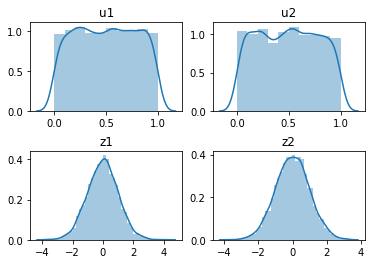

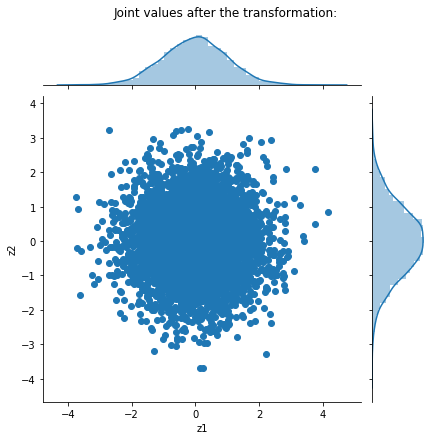

In [28]:
# Set seed 
np.random.seed(1)

# uniformly distributed values between 0 and 1
u1 = random.rand(n_samples)
u2 = random.rand(n_samples)

# run the transformation
z1,z2 = sample_normal_boxmuller(u1, u2)

# plotting the values before and after the transformation
figure()
subplot(221, title="u1")     # the first row of graphs
sns.distplot(u1, bins=10)    # contains the histograms of u1 and u2 
subplot(222, title="u2")
sns.distplot(u2, bins=10)
subplot(223, title="z1")     # the second contains
sns.distplot(z1, bins=40)    # the histograms of z1 and z2
subplot(224, title="z2")
sns.distplot(z2, bins=40)

plt.subplots_adjust(top=None, bottom=None, left=None, right=None, hspace=0.45,
                    wspace=None)

# plotting the joint values after the transformation
sub = sns.jointplot(z1, z2, kind='scatter', marginal_kws=dict(bins=40, kde=True)).set_axis_labels("z1", "z2");
sub.fig.suptitle('Joint values after the transformation:'); sub.fig.subplots_adjust(top=0.92);

We can adjust the algorithm to generate numbers that are normally distributed with any mean and standard deviation as parameters

### Generate Samples

In [29]:
tic = timeit.default_timer()

# Generate n_samples samples 
samples_b_m = []
for i in range(n_samples):
    samples_b_m.append(sample_normal_boxmuller_adj(mu, sigma))  

toc = timeit.default_timer()

###  Histogram Plot

running time = 0.033, mean = -0.018, std_dev = 1.002


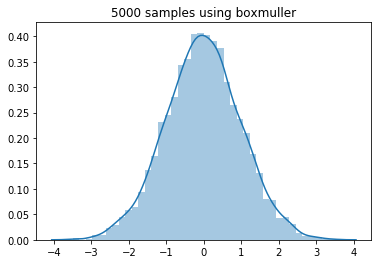

In [30]:
# Plot n_samples samples 
 
sns.distplot(samples_b_m, bins=40).set_title(str(n_samples)+ " samples using boxmuller");

print("running time = %.3f, mean = %.3f, std_dev = %.3f" % (toc-tic, np.mean(samples_b_m), np.std(samples_b_m)));

### Q-Q Plot and P-P Plot

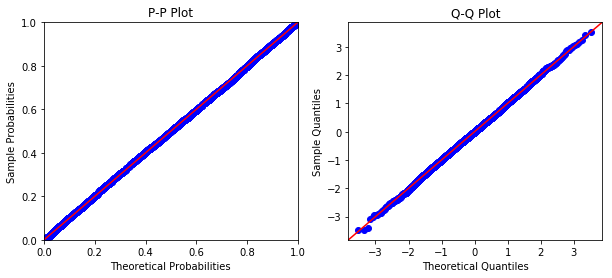

In [31]:
# Plot q-q and p-p plot
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
probplot = sm.ProbPlot(np.array(samples_b_m), dist=norm, fit=True)
probplot.ppplot(line='45', ax=ax[0])
probplot.qqplot(line='45', ax=ax[1])
ax[0].set_title('P-P Plot')
ax[1].set_title('Q-Q Plot');

### Boxplot

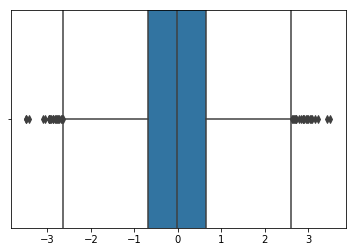

In [32]:
# Plot boxplot plot
sns.boxplot(samples_b_m, width=4);

### Empirical Cumulative Distribution Function Plot

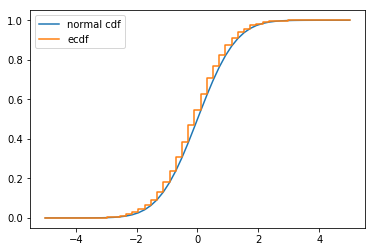

In [33]:
# Plot Empirical Cumulative Distribution vs Normal Cumulative Distribution
x=np.linspace(-5, 5)

# Plot normal cdf
plot_normal(x, mu=mu, sigma=sigma, cdf=True, label="normal cdf")

# Plor ecdf
ecdf = sm.distributions.ECDF(samples_b_m)
ecdf = ecdf(x)
plt.step(x, ecdf, label="ecdf")

plt.legend();

### Shapiro-Wilk Test

In [34]:
# Normality test
test = "Shapiro-Wilk Test"
stat, p = shapiro(samples_b_m)

# Round results
stat = round(stat, 3)
p = round(p, 3)

# Interpre results
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = "Sample does not look Gaussian (reject H0)"

# Create table
result_mat = [len(samples_b_m), stat, p, msg]

trace = go.Table(
    header=dict(values=['<b>Sample Size</b>', '<b>Statistic</b>', '<b>p-Value</b>', '<b>Comment</b>'],
                line = dict(width=0),
                fill = dict(color='rgba(42,63,95,0.8)'),
                align = 'center',
                font = dict(
                    color = '#ffffff',
                    size = 12
                )),
    cells=dict(values=np.array(result_mat).T,
               line = dict(width=0),
               fill = dict(color=[['#EBF0F8', '#ffffff', '#EBF0F8', '#ffffff']]),
               align = 'center',
               height = 40),
    columnwidth=[0.3, 0.25, 0.3, 0.45])
       
data = [trace]

layout = dict(title=test, height=260, width=1000)

sw_table = dict(data=data, layout=layout)

# Plot table
py.offline.iplot(sw_table)

### D’Agostino’s K^2 Test

In [35]:
# Normality test
test = "D’Agostino’s K^2 Test"
stat, p = normaltest(samples_b_m)

# Round results
stat = round(stat, 3)
p = round(p, 3)

# Interpre results
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = "Sample does not look Gaussian (reject H0)"

# Create table
result_mat = [len(samples_b_m), stat, p, msg]

trace = go.Table(
    header=dict(values=['<b>Sample Size</b>', '<b>Statistic</b>', '<b>p-Value</b>', '<b>Comment</b>'],
                line = dict(width=0),
                fill = dict(color='rgba(42,63,95,0.8)'),
                align = 'center',
                font = dict(
                    color = '#ffffff',
                    size = 12
                )),
    cells=dict(values=np.array(result_mat).T,
               line = dict(width=0),
               fill = dict(color=[['#EBF0F8', '#ffffff', '#EBF0F8', '#ffffff']]),
               align = 'center',
               height = 40),
    columnwidth=[0.3, 0.25, 0.3, 0.45])
       
data = [trace]

layout = dict(title=test, height=260, width=1000)

norm_table = dict(data=data, layout=layout)

# Plot table
py.offline.iplot(norm_table)

### Jarque-Beta Test

In [36]:
# Normality test
test = "Jarque-Beta Test"
stat, p = stats.jarque_bera(samples_b_m)

# Round results
stat = round(stat, 3)
p = round(p, 3)

# Interpre results
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = "Sample does not look Gaussian (reject H0)"

# Create table
result_mat = [len(samples_b_m), stat, p, msg]

trace = go.Table(
    header=dict(values=['<b>Sample Size</b>', '<b>Statistic</b>', '<b>p-Value</b>', '<b>Comment</b>'],
                line = dict(width=0),
                fill = dict(color='rgba(42,63,95,0.8)'),
                align = 'center',
                font = dict(
                    color = '#ffffff',
                    size = 12
                )),
    cells=dict(values=np.array(result_mat).T,
               line = dict(width=0),
               fill = dict(color=[['#EBF0F8', '#ffffff', '#EBF0F8', '#ffffff']]),
               align = 'center',
               height = 40),
    columnwidth=[0.3, 0.25, 0.3, 0.45])
       
data = [trace]

layout = dict(title=test, height=260, width=1000)

jb_table = dict(data=data, layout=layout)

# Plot table
py.offline.iplot(jb_table)

### Kolmogorov Smirnov Test

In [37]:
# Normality test
test = "Kolmogorov Smirnov Test"
stat, p = stats.kstest(np.array(samples_b_m),'norm', alternative = 'greater')

# Round results
stat = round(stat, 3)
p = round(p, 3)

# Interpre results
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = "Sample does not look Gaussian (reject H0)"

# Create table
result_mat = [len(samples_b_m), stat, p, msg]

trace = go.Table(
    header=dict(values=['<b>Sample Size</b>', '<b>Statistic</b>', '<b>p-Value</b>', '<b>Comment</b>'],
                line = dict(width=0),
                fill = dict(color='rgba(42,63,95,0.8)'),
                align = 'center',
                font = dict(
                    color = '#ffffff',
                    size = 12
                )),
    cells=dict(values=np.array(result_mat).T,
               line = dict(width=0),
               fill = dict(color=[['#EBF0F8', '#ffffff', '#EBF0F8', '#ffffff']]),
               align = 'center',
               height = 40),
    columnwidth=[0.3, 0.25, 0.3, 0.45])
       
data = [trace]

layout = dict(title=test, height=260, width=1000)

ks_table = dict(data=data, layout=layout)

# Plot table
py.offline.iplot(ks_table)

### Anderson-Darling

In [38]:
# Normality test
test = "Anderson-Darling Test"
result = anderson(samples_b_m)

# Round results
stat = round(result.statistic, 3)

# Create table
result_mat = []
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        msg = 'Sample looks Gaussian (fail to reject H0)'
    else:
        msg = 'Sample does not look Gaussian (reject H0)'
    result_mat.append([len(samples_b_m), stat, sl, cv, msg])

trace = go.Table(
    header=dict(values=['<b>Sample Size</b>', '<b>Statistic</b>', '<b>Significance Level</b>', '<b>Critical Value</b>', '<b>Comment</b>'],
                line = dict(width=0),
                fill = dict(color='rgba(42,63,95,0.8)'),
                align = 'center',
                font = dict(
                    color = '#ffffff',
                    size = 12
                )),
    cells=dict(values=np.array(result_mat).T,
               line = dict(width=0),
               fill = dict(color=[['#EBF0F8', '#ffffff', '#EBF0F8', '#ffffff', '#EBF0F8']]),
               align = 'center',
               height = 40),
    columnwidth=[0.3, 0.25, 0.3, 0.25, 0.5])
       
data = [trace]

layout = dict(title=test, height=415, width=1000)

andar_table = dict(data=data, layout=layout)

# Plot table
py.offline.iplot(andar_table)

## 4.4 Normal Distribution using the numpy.random

### Generate Samples

In [39]:
# Set seed 
np.random.seed(1)

tic = timeit.default_timer()

# Generate n_samples samples 
samples_n_r = []
for i in range(n_samples):
    samples_n_r.append(np.random.normal(mu, sigma))  

toc = timeit.default_timer()

###  Histogram Plot

running time = 0.019, mean = 0.024, std_dev = 1.003


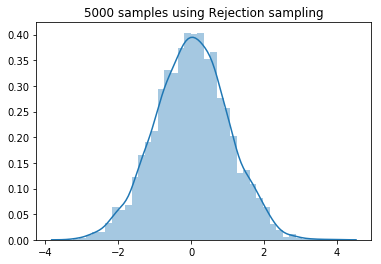

In [40]:
# Plot n_samples samples

sns.distplot(samples_n_r, bins=40).set_title(str(n_samples)+ " samples using Rejection sampling");

print("running time = %.3f, mean = %.3f, std_dev = %.3f" % (toc-tic, np.mean(samples_n_r), np.std(samples_n_r)));

### QQ Plot

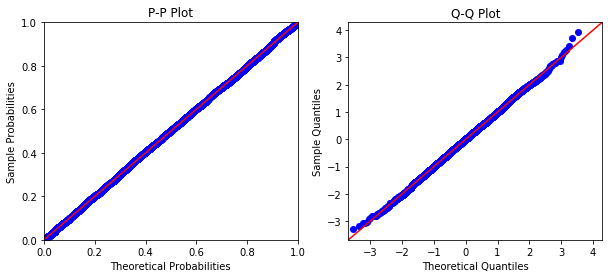

In [41]:
# Plot q-q and p-p plot
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
probplot = sm.ProbPlot(np.array(samples_n_r), dist=norm, fit=True)
probplot.ppplot(line='45', ax=ax[0])
probplot.qqplot(line='45', ax=ax[1])
ax[0].set_title('P-P Plot')
ax[1].set_title('Q-Q Plot');

### Boxplot

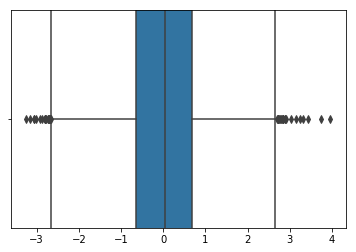

In [42]:
sns.boxplot(samples_n_r, width=4);

### Empirical Cumulative Distribution Function Plot

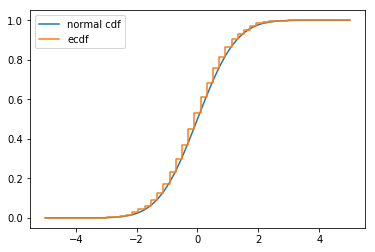

In [43]:
# Plot Empirical Cumulative Distribution vs Normal Cumulative Distribution
x=np.linspace(-5, 5)

# Plot normal cdf
plot_normal(x, mu=mu, sigma=sigma, cdf=True, label="normal cdf")

# Plor ecdf
ecdf = sm.distributions.ECDF(samples_n_r)
ecdf = ecdf(x)
plt.step(x, ecdf, label="ecdf")

plt.legend();

### Shapiro-Wilk Test

In [44]:
# Normality test
test = "Shapiro-Wilk Test"
stat, p = shapiro(samples_n_r)

# Round results
stat = round(stat, 3)
p = round(p, 3)

# Interpre results
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = "Sample does not look Gaussian (reject H0)"

# Create table
result_mat = [len(samples_n_r), stat, p, msg]

trace = go.Table(
    header=dict(values=['<b>Sample Size</b>', '<b>Statistic</b>', '<b>p-Value</b>', '<b>Comment</b>'],
                line = dict(width=0),
                fill = dict(color='rgba(42,63,95,0.8)'),
                align = 'center',
                font = dict(
                    color = '#ffffff',
                    size = 12
                )),
    cells=dict(values=np.array(result_mat).T,
               line = dict(width=0),
               fill = dict(color=[['#EBF0F8', '#ffffff', '#EBF0F8', '#ffffff']]),
               align = 'center',
               height = 40),
    columnwidth=[0.3, 0.25, 0.3, 0.45])
       
data = [trace]

layout = dict(title=test, height=260, width=1000)

sw_table = dict(data=data, layout=layout)

# Plot table
py.offline.iplot(sw_table)

### D’Agostino’s K^2 Test

In [45]:
# Normality test
test = "D’Agostino’s K^2 Test"
stat, p = normaltest(samples_n_r)

# Round results
stat = round(stat, 3)
p = round(p, 3)

# Interpre results
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = "Sample does not look Gaussian (reject H0)"

# Create table
result_mat = [len(samples_n_r), stat, p, msg]

trace = go.Table(
    header=dict(values=['<b>Sample Size</b>', '<b>Statistic</b>', '<b>p-Value</b>', '<b>Comment</b>'],
                line = dict(width=0),
                fill = dict(color='rgba(42,63,95,0.8)'),
                align = 'center',
                font = dict(
                    color = '#ffffff',
                    size = 12
                )),
    cells=dict(values=np.array(result_mat).T,
               line = dict(width=0),
               fill = dict(color=[['#EBF0F8', '#ffffff', '#EBF0F8', '#ffffff']]),
               align = 'center',
               height = 40),
    columnwidth=[0.3, 0.25, 0.3, 0.45])
       
data = [trace]

layout = dict(title=test, height=260, width=1000)

norm_table = dict(data=data, layout=layout)

# Plot table
py.offline.iplot(norm_table)

### Jarque-Beta Test

In [46]:
# Normality test
test = "Jarque-Beta Test"
stat, p = stats.jarque_bera(samples_n_r)

# Round results
stat = round(stat, 3)
p = round(p, 3)

# Interpre results
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = "Sample does not look Gaussian (reject H0)"

# Create table
result_mat = [len(samples_n_r), stat, p, msg]

trace = go.Table(
    header=dict(values=['<b>Sample Size</b>', '<b>Statistic</b>', '<b>p-Value</b>', '<b>Comment</b>'],
                line = dict(width=0),
                fill = dict(color='rgba(42,63,95,0.8)'),
                align = 'center',
                font = dict(
                    color = '#ffffff',
                    size = 12
                )),
    cells=dict(values=np.array(result_mat).T,
               line = dict(width=0),
               fill = dict(color=[['#EBF0F8', '#ffffff', '#EBF0F8', '#ffffff']]),
               align = 'center',
               height = 40),
    columnwidth=[0.3, 0.25, 0.3, 0.45])
       
data = [trace]

layout = dict(title=test, height=260, width=1000)

jb_table = dict(data=data, layout=layout)

# Plot table
py.offline.iplot(jb_table)

### Kolmogorov Smirnov Test

In [47]:
# Normality test
test = "Kolmogorov Smirnov Test"
stat, p = stats.kstest(np.array(samples_n_r),'norm', alternative = 'greater')

# Round results
stat = round(stat, 3)
p = round(p, 3)

# Interpre results
alpha = 0.05
if p > alpha:
    msg = 'Sample looks Gaussian (fail to reject H0)'
else:
    msg = "Sample does not look Gaussian (reject H0)"

# Create table
result_mat = [len(samples_n_r), stat, p, msg]

trace = go.Table(
    header=dict(values=['<b>Sample Size</b>', '<b>Statistic</b>', '<b>p-Value</b>', '<b>Comment</b>'],
                line = dict(width=0),
                fill = dict(color='rgba(42,63,95,0.8)'),
                align = 'center',
                font = dict(
                    color = '#ffffff',
                    size = 12
                )),
    cells=dict(values=np.array(result_mat).T,
               line = dict(width=0),
               fill = dict(color=[['#EBF0F8', '#ffffff', '#EBF0F8', '#ffffff']]),
               align = 'center',
               height = 40),
    columnwidth=[0.3, 0.25, 0.3, 0.45])
       
data = [trace]

layout = dict(title=test, height=260, width=1000)

ks_table = dict(data=data, layout=layout)

# Plot table
py.offline.iplot(ks_table)

### Anderson-Darling

In [48]:
# Normality test
test = "Anderson-Darling Test"
result = anderson(samples_n_r)

# Round results
stat = round(result.statistic, 3)

# Create table
result_mat = []
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        msg = 'Sample looks Gaussian (fail to reject H0)'
    else:
        msg = 'Sample does not look Gaussian (reject H0)'
    result_mat.append([len(samples_n_r), stat, sl, cv, msg])

trace = go.Table(
    header=dict(values=['<b>Sample Size</b>', '<b>Statistic</b>', '<b>Significance Level</b>', '<b>Critical Value</b>', '<b>Comment</b>'],
                line = dict(width=0),
                fill = dict(color='rgba(42,63,95,0.8)'),
                align = 'center',
                font = dict(
                    color = '#ffffff',
                    size = 12
                )),
    cells=dict(values=np.array(result_mat).T,
               line = dict(width=0),
               fill = dict(color=[['#EBF0F8', '#ffffff', '#EBF0F8', '#ffffff', '#EBF0F8']]),
               align = 'center',
               height = 40),
    columnwidth=[0.3, 0.25, 0.3, 0.25, 0.5])
       
data = [trace]

layout = dict(title=test, height=415, width=1000)

andar_table = dict(data=data, layout=layout)

# Plot table
py.offline.iplot(andar_table)